# HarperNet: Sprint 1: Story 1

## Story 1: Correctly labelling the data
* In this story, we have created a function that takes a set of images in different folders and returns a list, with one element an array of the image, one element the category name, and one element the binary label. 

**Part 2**: 
* We need to be sure the list of images is good enough to be passed to a model. We understand how the images are taken and passed in to the model.
* This is about exploring the dataset class. 


**To do:** 
* look up os.join code and glob to see if it can be improved (Geity blog; CV2, matplotlib - see my original notebook etc)
* check whether you prefer mpimg or plt etc
* code as a file and import functionality 
* understand why running this code seems to duplicate pictures
* transition to Visual Code as a code file and import functionality

### Part 1

#### Function to read our images and return a list

In [1]:
# required import statements 
import os
import glob                          # library for loading images from a directory
import matplotlib.image as mpimg
from PIL import Image

In [3]:
def image_load(image_dir, folder_names):
    '''
    takes as input a filepath and folders and returns a list of (numpy array, folder, label) items
    image_dir: a filepath to image folders
    folder names: image folder names to be appended
    '''
    
    # create an empty image list to then populate 
    image_list = []
    
    for i,folder in enumerate(folder_names):
    
        # go through all the files in each folder 
        for file in glob.glob(os.path.join(image_dir,folder, "*")):

            # Read in the image - this loads the imges as an array  ## here we could read it in as a PIL format
            image_array = mpimg.imread(file)

            # Check if the image exists/if it's been correctly read-in
            if not image_array is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                image_list.append((image_array, folder, i))
    
    return image_list

In [4]:
# I think we use Image.open to read in PIL images  

def PIL_image_load(image_dir, folder_names):
    '''
    takes as input a filepath and folders and returns a list of (PIL image, folder, label) items
    image_dir: a filepath to image folders
    folder names: image folder names to be appended
    '''
    
    # create an empty image list to then populate 
    image_list = []
    
    for i,folder in enumerate(folder_names):
    
        # go through all the files in each folder 
        for file in glob.glob(os.path.join(image_dir,folder, "*")):

            # Read in the image - this loads the imges as an array  ## here we could read it in as a PIL format
            image_PIL = Image.open(file)

            # Check if the image exists/if it's been correctly read-in
            if not image_PIL is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                image_list.append((image_PIL, folder, i))
    
    return image_list

#### Test of the function

In [5]:
# use this to name our folders we want to use 
folder_names = ["Feed","Nothing"]

# define our image directory 
image_dir = '/Users/drh/Documents/HarperNet/HarperImages/'

# first test of function
PIL_function_test = PIL_image_load(image_dir,folder_names)

In [6]:
len(PIL_function_test)

110

In [87]:
# PIL_function_test[0][0]

In [99]:
# here we shuffle - how 'permanent' is this? can i shuffle once and pass that to the HarperDataset class?

from random import shuffle
# shuffled_list = [[i] for i in range(10)]
shuffle(PIL_function_test)

In [100]:
for i in range(len(PIL_function_test)):
    print(PIL_function_test[i][2]) 
    
    if i == 10:
        break

1
1
0
0
1
1
0
1
0
0
0


#### Test of non-PIL function

In [4]:
# use this to name our folders we want to use 
folder_names = ["Feed","Nothing"]

# define our image directory 
image_dir = '/Users/drh/Documents/HarperNet/HarperImages/'

# first test of function
first_function_test = image_load(image_dir,folder_names)

In [79]:
# len(first_function_test)

In [80]:
# first_function_test[0][0]

#### Function to get a mapping of categories to binary

In [81]:
def category_number_mapping(category_names):    
    '''
    pass in a list of category names
    returns the category - number mapping used when loading images
    '''

    # create an empty list 
    names_to_number = []

    # iterate through the folders
    for i, category in enumerate(category_names):

        # append to our new list in category:number mapping
        names_to_number.append((category, i))

    # return list 
    return names_to_number

#### Test function

In [82]:
test_names_number = category_number_mapping(folder_names)
test_names_number

[('Feed', 0), ('Nothing', 1)]

### Part 2

#### Dataset class
**Assumptions:**
* We need to create a `dataset` class that takes the data and returns the images and class labels
* I assume `dataset` requires an `X` and `y` output - I can use the code above
* We create a `transform` function and pass this to the dataset function 
* **widki** How do I create train, val and test datasets without pre-doing this?
* **widki** Do I need to shuffle the data in this function 

**Plan** 
* 1. Write a `dataset` class assuming that the above loading happens outside the function and returns `PyTorch tensor` and `label`
    * If so, we can assume it takes a list
    * We can presplit the data into test, train and val if required 
* 2. Investigate test, train, val splitting within the `dataset` class - this might actually be something for `dataloader`? 
    * I think we need to have presplit datasets and then generate separate test, val, train dataloaders, all of which have data passed through the dataset class. In this case the class we write above can be presplit by me and used repeatedly as a way of loading in  
3. If we presplit, think about how: shuffle than split? Can we visualise the split? Can we split along the lines of the overall dataset? 
4. we can pass the load_images function in to the e.g. `image, target_image = load_images(self.paths[index])` 
    
**1. Dataset class**
* **Assumption**: *ALL* we want the dataset class to do is return a PyTorch friendly dataset. That means:
    * X,y labels 
    * Transformed - **widki** this doesn't happen in DataLoader but check
* Therefore we need to have our train, test and val sets pre-sorted. The only two ways I can think to do this, given the starting position I have is - load data using the functions above and then create a directory to put them in, or separate into lists prior to passing in to Dataset function.
* **widki**: how much of the `dataset class` can take the code from the `load_images` function? We could go through images, label then and put them back in test, train and val folders??

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader

class HarperNetDataset(Dataset):
    ''' class to process the HarperNet dataset'''
    
    def __init__(self, dataset, transform = None):
        '''
        dataset: assumes this is a list of numpy array, label pairs preprocessed by the image_load function
        transforms: assumes we can pass transforms from the torchvision.transforms.Compose
        '''
        self.dataset = dataset
        self.transform = transform
        
    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, index):
        # getitem used for for loops as well as indexing 
        # if we needed to read an image, we do it here as its more memory efficient than in _init_
        # where the images would be read as the function initiated not just when required
        
        # note the squirrely bit here because of the way I have structured the load_images function
        X, y = self.dataset[index][0], self.dataset[index][2]
        
        ## add in transform bit here if required - ToTensor particularly 
        ## this could be sample = {'image': image, 'landmarks': landmarks} too 
        
        return X, y

In [17]:
# pass in our existing list
harperdata_test = HarperNetDataset(first_function_test)

In [18]:
# get the length
len(harperdata_test)

110

In [38]:
# get one sample - this now works 
# harperdata_test[0]

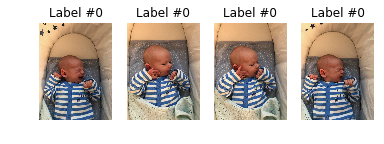

In [37]:
# plot images generated from the dataset - prior to transformation

# import matplotlib
import matplotlib.pyplot as plt

# can definitely tidy this up with the code I have learnt in the data notebook
# think amending this will make the images bigger
fig = plt.figure()

for i in range(len(harperdata_test)):
    
    ax = plt.subplot(1, 4, i + 1)
    
    ax.imshow(harperdata_test[i][0])
    ax.set_title('Label #{}'.format(harperdata_test[i][1]))
    ax.axis('off')
    
    if i == 3:
        break

In [25]:
# note that we can't do this...we can't return the labels and the data separetly 
# harper_data, harper_labels = HarperNetDataset(first_function_test)

**Friday 21 Dec**
* We have a dataset class, called `HarperNetDataset`. This currently returns an X and y, but we could make it return a dictionary of image and the label. we could also include a `transform` such as `ToTensor()`.
* What we need to do now is pass in the `transforms` operation. We will do just one at first, a `Crop`, and then note the others we need to do. This will include `ToTensor()`, operations for Data Augmentation, and then anything that is required for our transfer learning networks.
* We will then generate a `dataloader` from this transformed dataset.

In [47]:
harperdata_test[0][0].shape

(4032, 3024, 3)

In [56]:
# I know that torchvision includes some transforms so let's test on that.
from torchvision import transforms

preprocess = transforms.Compose([transforms.ToPILImage(),
                                 transforms.RandomCrop(224)])

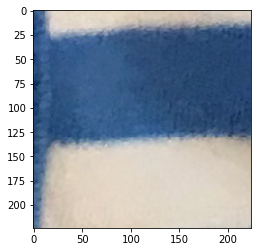

In [58]:
sample = harperdata_test[0][0]

processed_sample = preprocess(sample)

plt.imshow(processed_sample)
#processed_sample.shape

**wiki**: 
* `transforms.Compose`is a callable class that allows us to perform transformations on images. Presumably it has code that loops through an image/array and amends it. **widki** look up source code. 
* Using `transforms.Compose`. we can add in custom transform classes, or use those provided. I will start with the provided classes, and then look to the provided code via Udacity/PyTorch.
* Once we have defined the transforms, we can store them in a variable and apply the transforms to an image, outside of the dataset fucntionality. 
* We need to convert the dataset to a PIL image to apply transformations, but its unclear what the implications for the rest of the data are.
**widki**:
* Why PyTorch needs a PIL image to apply transforms to?
    * Do I need to convert my dataset to PIL in the Dataset class?
    * Do i need to convert only from the transforms? If so, how?
    * What does it mean for ToTensor()?
    * What is it that actually goes to the NN? Not sure I really understand how we convert to PIL then all is ok for the NN?
    * **wiki?**: the answer might be - order matters, so convert to PIL, apply transforms, convert ToTensor, which can conver. **BUT** - some discussion that we should have already converted the images to PIL before they come to transforms, perhaps so they are the same for the test and train sets. 
        * Could ensure ToPIL is provided as a transform for all the data sets
        * Could apply PIL in first set of functions - image_loader
        * Or in a transform function in the dataset class 
* When we transform the images, what happens to them, does each transform generate another input into the NN, with an associated (provided) label? 
    * NO, see here: https://discuss.pytorch.org/t/data-augmentation-in-pytorch/7925
    * Basically, augmentation means that each at training epoch the images are modified as per the augmentation - in a way we are adding noise, noise is good to prevent overfitting and improve the generalisation of the model 
* Do I need to revisit what libraries I use for reading and showing images? plt, PIL, skimage? (Cover this in the presentation). **widki** look up more on PIL. 
    * PIL represents images as (1,0)
        

In [67]:
# test this all out with PIL function

PIL_harper = HarperNetDataset(PIL_function_test)

In [68]:
PIL_process = transforms.Compose([transforms.RandomCrop(224),
                                  transforms.])

In [72]:
PIL_sample = PIL_harper[0][0]

PIL_processed_sample = preprocess(PIL_sample)


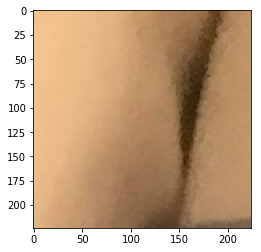

In [70]:
plt.imshow(PIL_processed_sample)

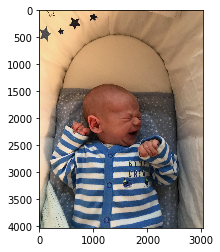

In [73]:
plt.imshow(PIL_harper[0][0])

**Saturday**
* Define transforms
* define data loader
* get data split between train, test, val
* use preexisting model as model.py
* execute a training run with model
**Sunday**
* Get better data set, use two classes but more images
* Build inference model
* Get code in files and on github
* Train new model, see if you need GPU 
**Monday**
* Refine dataset 
* Start to understand options for training and best practices

In [ ]:
batch_size = 32

train_loader = DataLoader(PIL_harper,batch_size=batch_size, num_workers=4)